Processing file for year 2001: 05800110.bpd
Year 2001: Volume = 88.49 cubic yards, Beach Width = 436.60 feet
Processing file for year 2002: 05800211.bpd
Year 2002: Volume = 73.91 cubic yards, Beach Width = 397.40 feet
Processing file for year 2003: 05800310.bpd
Year 2003: Volume = 71.01 cubic yards, Beach Width = 360.00 feet
Processing file for year 2004: 05800410.bpd
Year 2004: Volume = 65.66 cubic yards, Beach Width = 373.30 feet
Processing file for year 2005: 05800510.bpd
Year 2005: Volume = 66.31 cubic yards, Beach Width = 496.90 feet
Processing file for year 2006: 05800610.bpd
Year 2006: Volume = 67.22 cubic yards, Beach Width = 423.90 feet
Processing file for year 2007: 05800710.bpd
Year 2007: Volume = 52.76 cubic yards, Beach Width = 331.60 feet
Processing file for year 2008: 05800810.bpd
Year 2008: Volume = 60.28 cubic yards, Beach Width = 343.10 feet
Processing file for year 2009: 05800910.bpd
Year 2009: Volume = 57.49 cubic yards, Beach Width = 334.60 feet
Processing file for

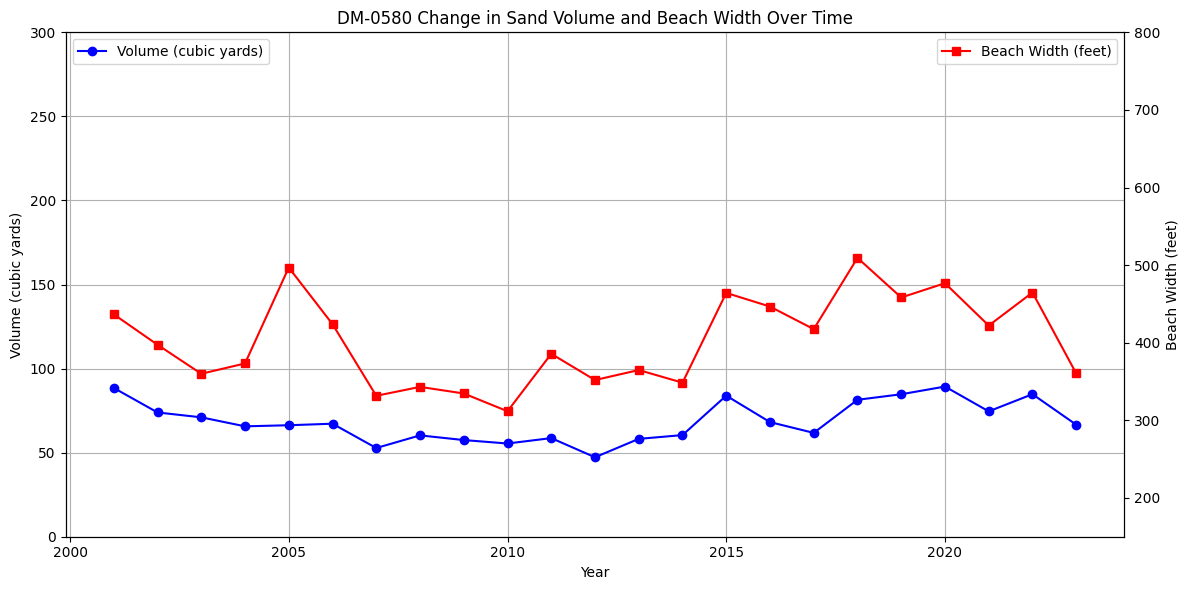

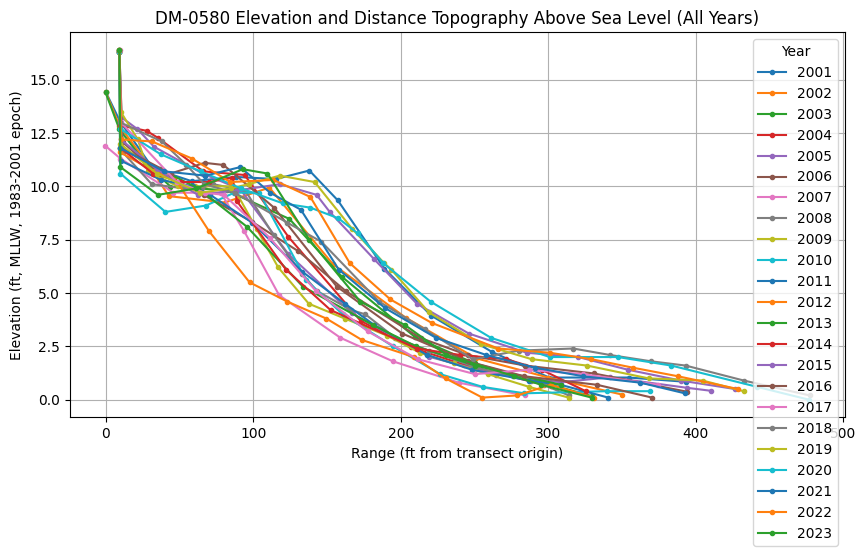

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume
def process_bpd_file(filename):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out negative elevation values
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] >= 0]

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits sea level
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= 0].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Create an empty list to store DataFrame, filtered DataFrame, volume, and beach width tuples
data_list = []

# Process each BPD file and calculate volumes
file_list = [ '05800110.bpd', '05800211.bpd', '05800310.bpd', '05800410.bpd', '05800510.bpd', '05800610.bpd', '05800710.bpd', '05800810.bpd', '05800910.bpd', '05801010.BPD', '05801110.bpd', '05801212.bpd', '05801310.bpd', '05801410.bpd', '05801510.bpd', '05801610.bpd', '05801710.bpd', '05801810.bpd', '05801910.bpd', '05802010.bpd', '05802110.bpd', '05802210.bpd', '05802310.bpd']

for year, filename in enumerate(file_list, start=2001):
    print(f"Processing file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        data_list.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year}: Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame from collected data
volumes_df = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Calculate deltas (change from previous year)
volumes_df['Delta Volume (cubic yards)'] = volumes_df['Volume (cubic yards)'].diff()

# Display volumes, beach width, and deltas as a table
print("Volumes, Beach Width, and Delta Volumes Over Time:")
print(volumes_df)

# Plotting the volumes and beach width over time
plt.figure(figsize=(12, 6))

# Plot 1: Volume (left y-axis)
plt.plot(volumes_df['Year'], volumes_df['Volume (cubic yards)'], marker='o', color='b', label='Volume (cubic yards)')
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 300)
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='upper left')

# Create a secondary y-axis for beach width
plt.twinx()

# Plot 2: Beach Width (right y-axis)
plt.plot(volumes_df['Year'], volumes_df['Beach Width (feet)'], marker='s', color='r', label='Beach Width (feet)')
plt.ylabel('Beach Width (feet)')
plt.ylim(150, 800)
plt.legend(loc='upper right')

# Title and layout adjustments
plt.title('DM-0580 Change in Sand Volume and Beach Width Over Time')
plt.tight_layout()
plt.show()

# Plotting the elevation and distance topography above sea level for all years on one graph
plt.figure(figsize=(10, 5))

for year, df_filtered in zip(volumes_df['Year'], volumes_df['Filtered DataFrame']):
    plt.plot(df_filtered['Range (ft from transect origin)'], df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'], marker='.', label=f'{year}')

plt.title('DM-0580 Elevation and Distance Topography Above Sea Level (All Years)')
plt.xlabel('Range (ft from transect origin)')
plt.ylabel('Elevation (ft, MLLW, 1983-2001 epoch)')
plt.grid(True)
plt.legend(title='Year')
plt.show()


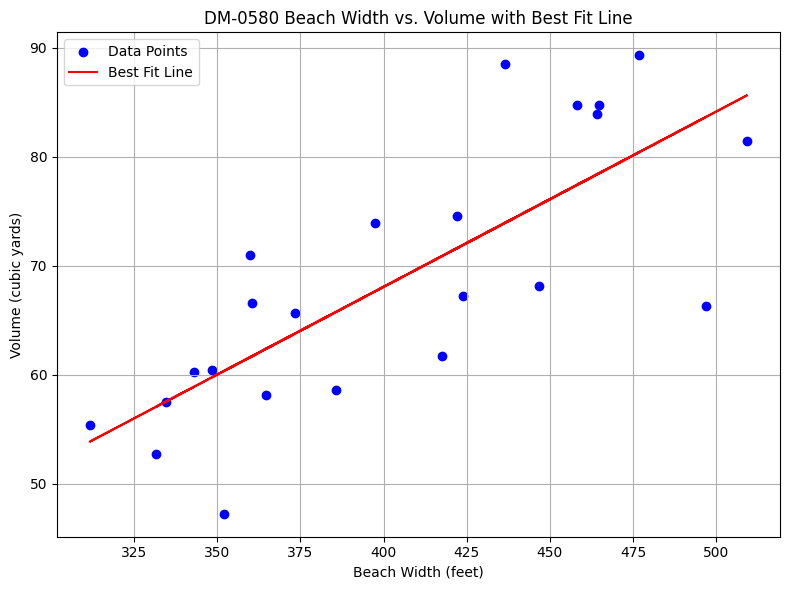

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Beach Width vs. Volume
plt.figure(figsize=(8, 6))
plt.scatter(volumes_df['Beach Width (feet)'], volumes_df['Volume (cubic yards)'], color='blue', label='Data Points')

# Calculate the line of best fit
m, b = np.polyfit(volumes_df['Beach Width (feet)'].dropna(), volumes_df['Volume (cubic yards)'].dropna(), 1)
plt.plot(volumes_df['Beach Width (feet)'], m * volumes_df['Beach Width (feet)'] + b, color='red', label=f'Best Fit Line')

# Labeling the plot
plt.title('DM-0580 Beach Width vs. Volume with Best Fit Line')
plt.xlabel('Beach Width (feet)')
plt.ylabel('Volume (cubic yards)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Processing file for year 2001: 05800110.bpd
Year 2001: Volume = 61.19 cubic yards, Beach Width = 300.60 feet
Processing file for year 2002: 05800211.bpd
Year 2002: Volume = 48.20 cubic yards, Beach Width = 251.20 feet
Processing file for year 2003: 05800310.bpd
Year 2003: Volume = 47.57 cubic yards, Beach Width = 250.20 feet
Processing file for year 2004: 05800410.bpd
Year 2004: Volume = 44.24 cubic yards, Beach Width = 242.70 feet
Processing file for year 2005: 05800510.bpd
Year 2005: Volume = 40.18 cubic yards, Beach Width = 219.30 feet
Processing file for year 2006: 05800610.bpd
Year 2006: Volume = 40.52 cubic yards, Beach Width = 245.40 feet
Processing file for year 2007: 05800710.bpd
Year 2007: Volume = 33.59 cubic yards, Beach Width = 194.70 feet
Processing file for year 2008: 05800810.bpd
Year 2008: Volume = 38.58 cubic yards, Beach Width = 247.60 feet
Processing file for year 2009: 05800910.bpd
Year 2009: Volume = 36.26 cubic yards, Beach Width = 213.00 feet
Processing file for

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4ws

    Year  Volume (cubic yards)  Beach Width (feet)  \
0   2001             61.186333               300.6   
1   2002             48.195370               251.2   
2   2003             47.566185               250.2   
3   2004             44.235444               242.7   
4   2005             40.177352               219.3   
5   2006             40.519370               245.4   
6   2007             33.585259               194.7   
7   2008             38.577889               247.6   
8   2009             36.258519               213.0   
9   2010             35.426741               226.7   
10  2011             36.093111               217.8   
11  2012             28.010333               208.9   
12  2013             36.181963               250.5   
13  2014             36.707407               240.0   
14  2015             53.340259               285.4   
15  2016             44.139296               245.3   
16  2017             37.185778               211.5   
17  2018             48.9580

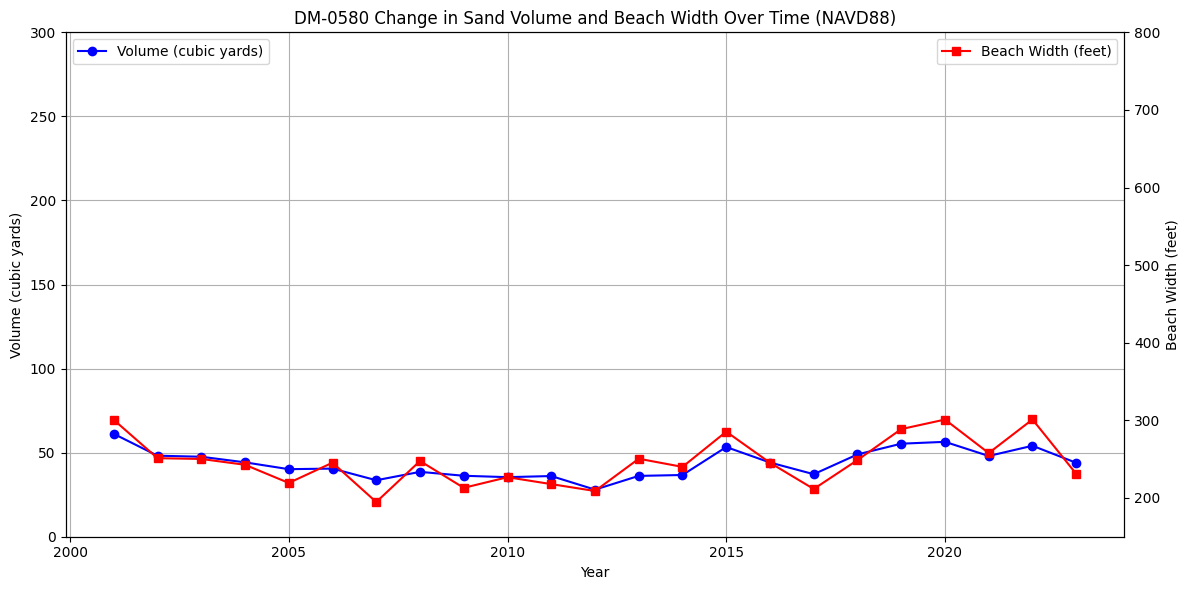

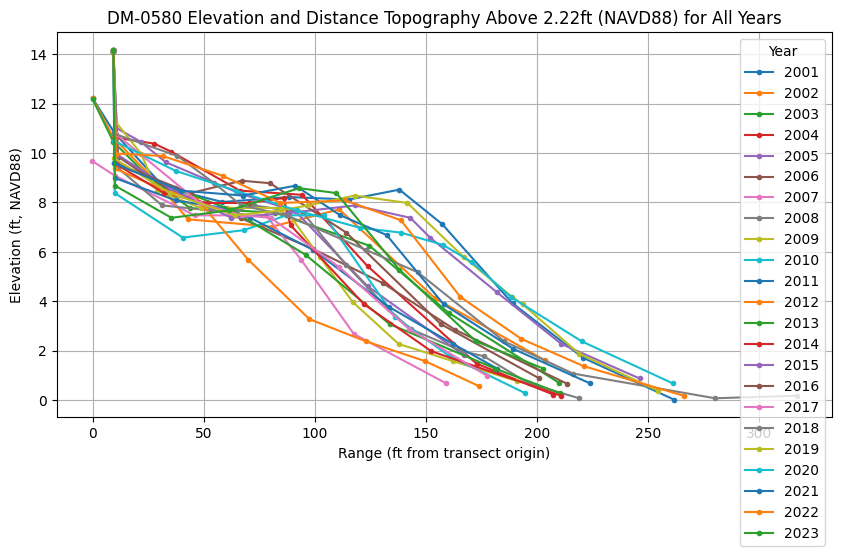

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Function to process BPD file and calculate volume based on NAVD88
def process_bpd_file_navd(filename, navd_threshold=2.22):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Filter out metadata lines (assuming metadata lines start with '*')
        data_lines = [line for line in lines if not line.startswith('*')]

        # Join the data lines into a single string, separating by new lines
        data_str = '\n'.join(data_lines)

        # Use StringIO to treat the string as a file object
        data_io = StringIO(data_str)

        # Read the data into a DataFrame
        df = pd.read_csv(data_io, header=None, names=['Range (ft from transect origin)', 'Elevation (ft, MLLW, 1983-2001 epoch)'])

        # Filter out data below the NAVD88 threshold (2.22 feet)
        df_filtered = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] > navd_threshold]

        # Adjust elevations to reference NAVD88 (not strictly necessary for volume but for interpretation)
        df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold

        # Calculate the sand volume using the trapezoidal rule with positive elevation values
        range_values = df_filtered['Range (ft from transect origin)'].values
        elevation_values = df_filtered['Elevation (ft, NAVD88)'].values
        volume_cubic_feet = np.trapz(elevation_values, range_values)

        # Convert volume from cubic feet to cubic yards
        volume_cubic_yards = volume_cubic_feet / 27

        # Determine beach width as the distance from the origin to where the transect hits the NAVD88 threshold
        sea_level_index = df[df['Elevation (ft, MLLW, 1983-2001 epoch)'] <= navd_threshold].index.min()
        beach_width_ft = df.loc[sea_level_index, 'Range (ft from transect origin)'] if not np.isnan(sea_level_index) else np.nan

        return df, df_filtered, volume_cubic_yards, beach_width_ft
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None, None, None, None

# Create an empty list to store DataFrame, filtered DataFrame, volume, and beach width tuples
data_list = []

# Process each BPD file and calculate volumes based on NAVD88
file_list = [ '05800110.bpd', '05800211.bpd', '05800310.bpd', '05800410.bpd', '05800510.bpd', '05800610.bpd', '05800710.bpd', '05800810.bpd', '05800910.bpd', '05801010.BPD', '05801110.bpd', '05801212.bpd', '05801310.bpd', '05801410.bpd', '05801510.bpd', '05801610.bpd', '05801710.bpd', '05801810.bpd', '05801910.bpd', '05802010.bpd', '05802110.bpd', '05802210.bpd', '05802310.bpd']

for year, filename in enumerate(file_list, start=2001):
    print(f"Processing file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        data_list.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year}: Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame from collected data
volumes_df = pd.DataFrame(data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])

# Calculate deltas (change from previous year)
volumes_df['Delta Volume (cubic yards)'] = volumes_df['Volume (cubic yards)'].diff()

# Display volumes, beach width, and deltas as a table
print("Volumes, Beach Width, and Delta Volumes Over Time:")
print(volumes_df)

# Plotting the volumes and beach width over time
plt.figure(figsize=(12, 6))

# Plot 1: Volume (left y-axis)
plt.plot(volumes_df['Year'], volumes_df['Volume (cubic yards)'], marker='o', color='b', label='Volume (cubic yards)')
plt.ylabel('Volume (cubic yards)')
plt.ylim(0, 300)
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='upper left')

# Create a secondary y-axis for beach width
plt.twinx()

# Plot 2: Beach Width (right y-axis)
plt.plot(volumes_df['Year'], volumes_df['Beach Width (feet)'], marker='s', color='r', label='Beach Width (feet)')
plt.ylabel('Beach Width (feet)')
plt.ylim(150, 800)
plt.legend(loc='upper right')

# Title and layout adjustments
plt.title('DM-0580 Change in Sand Volume and Beach Width Over Time (NAVD88)')
plt.tight_layout()
plt.show()

# Plotting the elevation and distance topography above sea level for all years on one graph
plt.figure(figsize=(10, 5))

for year, df_filtered in zip(volumes_df['Year'], volumes_df['Filtered DataFrame']):
    plt.plot(df_filtered['Range (ft from transect origin)'], df_filtered['Elevation (ft, NAVD88)'], marker='.', label=f'{year}')

plt.title('DM-0580 Elevation and Distance Topography Above 2.22ft (NAVD88) for All Years')
plt.xlabel('Range (ft from transect origin)')
plt.ylabel('Elevation (ft, NAVD88)')
plt.grid(True)
plt.legend(title='Year')
plt.show()


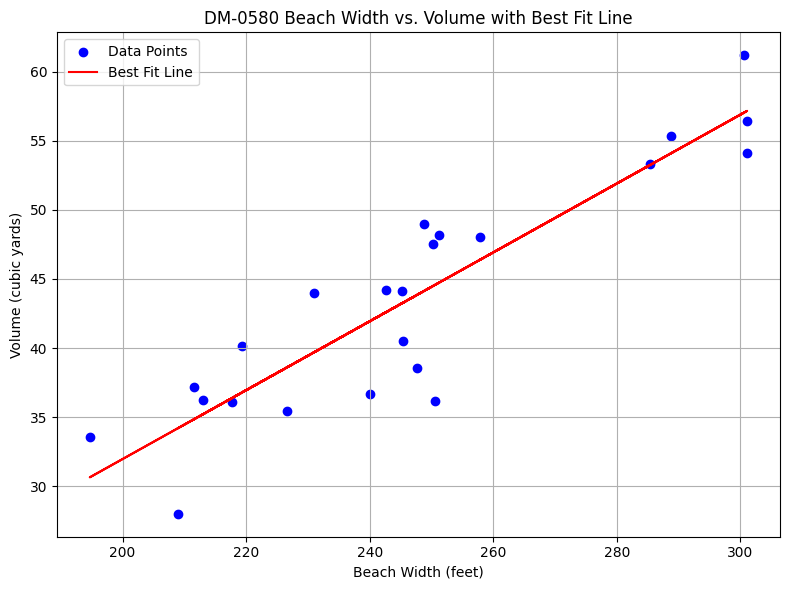

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Beach Width vs. Volume
plt.figure(figsize=(8, 6))
plt.scatter(volumes_df['Beach Width (feet)'], volumes_df['Volume (cubic yards)'], color='blue', label='Data Points')

# Calculate the line of best fit
m, b = np.polyfit(volumes_df['Beach Width (feet)'].dropna(), volumes_df['Volume (cubic yards)'].dropna(), 1)
plt.plot(volumes_df['Beach Width (feet)'], m * volumes_df['Beach Width (feet)'] + b, color='red', label=f'Best Fit Line')

# Labeling the plot
plt.title('DM-0580 Beach Width vs. Volume with Best Fit Line')
plt.xlabel('Beach Width (feet)')
plt.ylabel('Volume (cubic yards)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Process MLLW data
data_list_mllw = []

for year, filename in enumerate(file_list, start=2001):
    print(f"Processing MLLW file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        data_list_mllw.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year} (MLLW): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame for MLLW data
volumes_df_mllw = pd.DataFrame(data_list_mllw, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])


Processing MLLW file for year 2001: 05800110.bpd
Year 2001 (MLLW): Volume = 88.49 cubic yards, Beach Width = 436.60 feet
Processing MLLW file for year 2002: 05800211.bpd
Year 2002 (MLLW): Volume = 73.91 cubic yards, Beach Width = 397.40 feet
Processing MLLW file for year 2003: 05800310.bpd
Year 2003 (MLLW): Volume = 71.01 cubic yards, Beach Width = 360.00 feet
Processing MLLW file for year 2004: 05800410.bpd
Year 2004 (MLLW): Volume = 65.66 cubic yards, Beach Width = 373.30 feet
Processing MLLW file for year 2005: 05800510.bpd
Year 2005 (MLLW): Volume = 66.31 cubic yards, Beach Width = 496.90 feet
Processing MLLW file for year 2006: 05800610.bpd
Year 2006 (MLLW): Volume = 67.22 cubic yards, Beach Width = 423.90 feet
Processing MLLW file for year 2007: 05800710.bpd
Year 2007 (MLLW): Volume = 52.76 cubic yards, Beach Width = 331.60 feet
Processing MLLW file for year 2008: 05800810.bpd
Year 2008 (MLLW): Volume = 60.28 cubic yards, Beach Width = 343.10 feet
Processing MLLW file for year 20

In [12]:
# Process NAVD data
data_list_navd = []

for year, filename in enumerate(file_list, start=2001):
    print(f"Processing NAVD file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        data_list_navd.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year} (NAVD): Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame for NAVD data
volumes_df_navd = pd.DataFrame(data_list_navd, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])


Processing NAVD file for year 2001: 05800110.bpd
Year 2001 (NAVD): Volume = 61.19 cubic yards, Beach Width = 300.60 feet
Processing NAVD file for year 2002: 05800211.bpd
Year 2002 (NAVD): Volume = 48.20 cubic yards, Beach Width = 251.20 feet
Processing NAVD file for year 2003: 05800310.bpd
Year 2003 (NAVD): Volume = 47.57 cubic yards, Beach Width = 250.20 feet
Processing NAVD file for year 2004: 05800410.bpd
Year 2004 (NAVD): Volume = 44.24 cubic yards, Beach Width = 242.70 feet
Processing NAVD file for year 2005: 05800510.bpd
Year 2005 (NAVD): Volume = 40.18 cubic yards, Beach Width = 219.30 feet
Processing NAVD file for year 2006: 05800610.bpd
Year 2006 (NAVD): Volume = 40.52 cubic yards, Beach Width = 245.40 feet
Processing NAVD file for year 2007: 05800710.bpd
Year 2007 (NAVD): Volume = 33.59 cubic yards, Beach Width = 194.70 feet
Processing NAVD file for year 2008: 05800810.bpd
Year 2008 (NAVD): Volume = 38.58 cubic yards, Beach Width = 247.60 feet
Processing NAVD file for year 20

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4ws

Year 2023 (NAVD): Volume = 43.96 cubic yards, Beach Width = 231.00 feet


/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold


In [13]:
# Merge the two DataFrames on the 'Year' column
comparison_df = pd.merge(volumes_df_mllw, volumes_df_navd, on='Year', suffixes=('_MLLW', '_NAVD'))


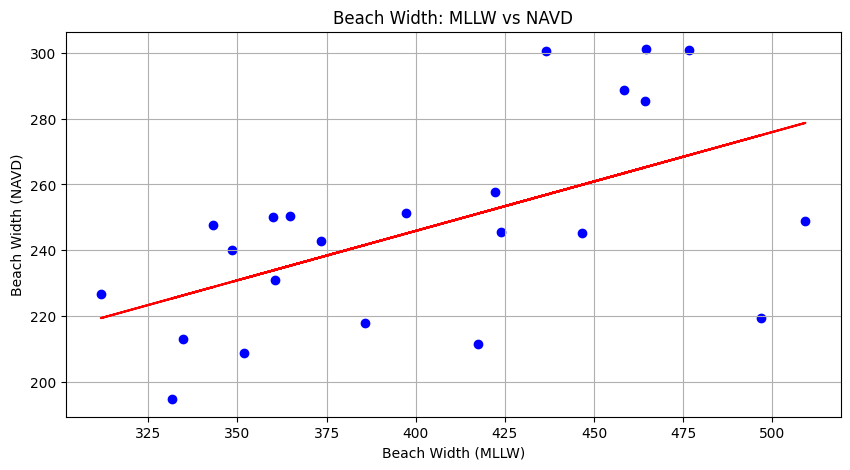

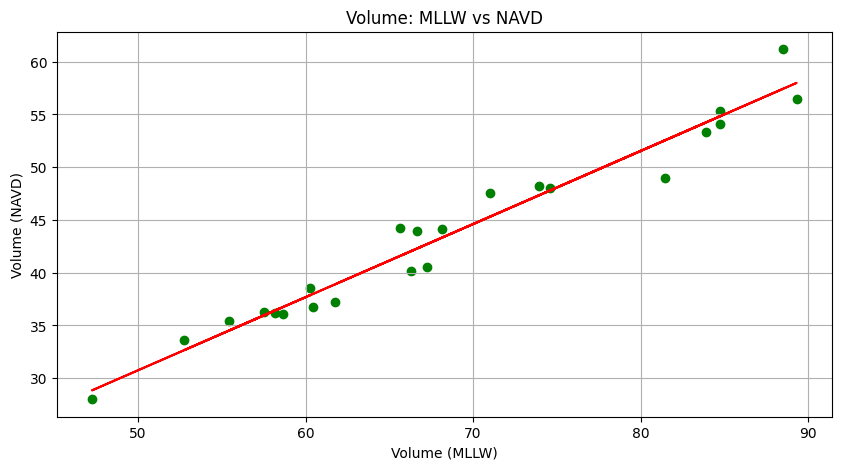

In [14]:
# Scatter plot for Beach Width
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'], color='b')
plt.title('Beach Width: MLLW vs NAVD')
plt.xlabel('Beach Width (MLLW)')
plt.ylabel('Beach Width (NAVD)')
plt.grid(True)

# Line of best fit
m, b = np.polyfit(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'], 1)
plt.plot(comparison_df['Beach Width (feet)_MLLW'], m * comparison_df['Beach Width (feet)_MLLW'] + b, color='r')
plt.show()

# Scatter plot for Volume
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'], color='g')
plt.title('Volume: MLLW vs NAVD')
plt.xlabel('Volume (MLLW)')
plt.ylabel('Volume (NAVD)')
plt.grid(True)

# Line of best fit
m, b = np.polyfit(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'], 1)
plt.plot(comparison_df['Volume (cubic yards)_MLLW'], m * comparison_df['Volume (cubic yards)_MLLW'] + b, color='r')
plt.show()


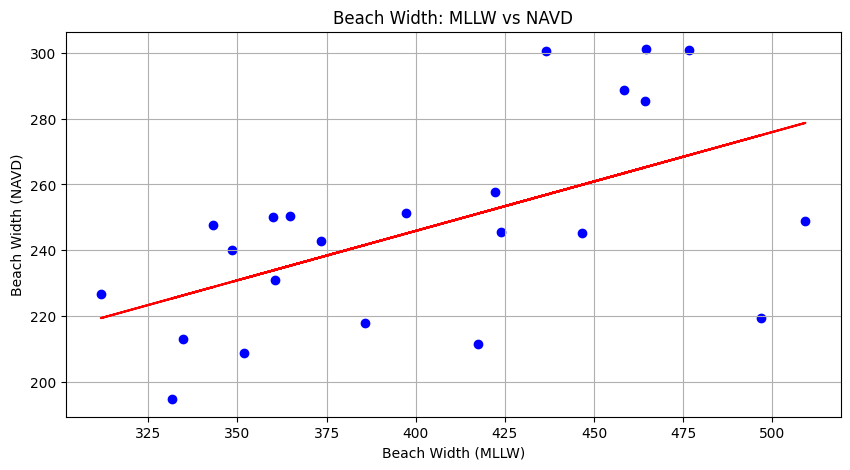

Beach Width Line of Best Fit: Slope (m) = 0.3004, Intercept (b) = 125.7096, R^2 = 0.3164


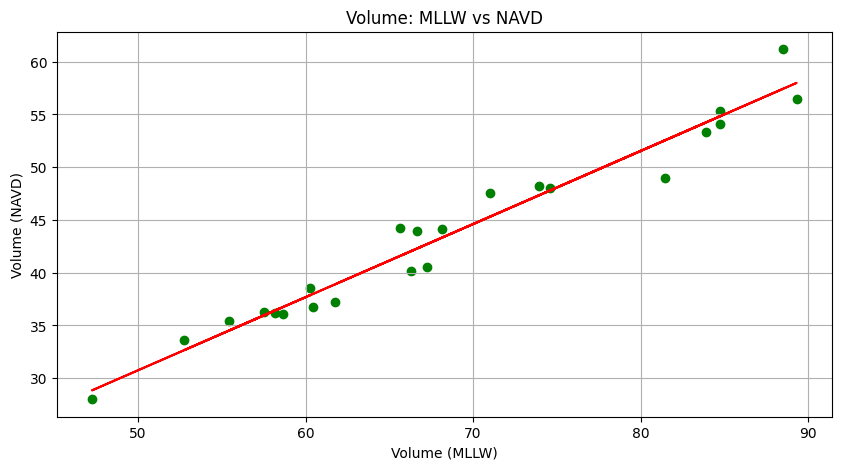

Volume Line of Best Fit: Slope (m) = 0.6929, Intercept (b) = -3.8889, R^2 = 0.9605


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Assuming `volumes_df_mllw` and `volumes_df_navd` are your DataFrames for MLLW and NAVD results respectively

# Merge the two DataFrames on the 'Year' column
comparison_df = pd.merge(volumes_df_mllw, volumes_df_navd, on='Year', suffixes=('_MLLW', '_NAVD'))

# Scatter plot for Beach Width
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'], color='b')
plt.title('Beach Width: MLLW vs NAVD')
plt.xlabel('Beach Width (MLLW)')
plt.ylabel('Beach Width (NAVD)')
plt.grid(True)

# Line of best fit for Beach Width
m_width, b_width = np.polyfit(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'], 1)
plt.plot(comparison_df['Beach Width (feet)_MLLW'], m_width * comparison_df['Beach Width (feet)_MLLW'] + b_width, color='r')

# Calculate R^2 for Beach Width
predicted_navd_width = m_width * comparison_df['Beach Width (feet)_MLLW'] + b_width
r2_width = r2_score(comparison_df['Beach Width (feet)_NAVD'], predicted_navd_width)

plt.show()

# Print slope, intercept, and R^2 for Beach Width
print(f"Beach Width Line of Best Fit: Slope (m) = {m_width:.4f}, Intercept (b) = {b_width:.4f}, R^2 = {r2_width:.4f}")

# Scatter plot for Volume
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'], color='g')
plt.title('Volume: MLLW vs NAVD')
plt.xlabel('Volume (MLLW)')
plt.ylabel('Volume (NAVD)')
plt.grid(True)

# Line of best fit for Volume
m_volume, b_volume = np.polyfit(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'], 1)
plt.plot(comparison_df['Volume (cubic yards)_MLLW'], m_volume * comparison_df['Volume (cubic yards)_MLLW'] + b_volume, color='r')

# Calculate R^2 for Volume
predicted_navd_volume = m_volume * comparison_df['Volume (cubic yards)_MLLW'] + b_volume
r2_volume = r2_score(comparison_df['Volume (cubic yards)_NAVD'], predicted_navd_volume)

plt.show()

# Print slope, intercept, and R^2 for Volume
print(f"Volume Line of Best Fit: Slope (m) = {m_volume:.4f}, Intercept (b) = {b_volume:.4f}, R^2 = {r2_volume:.4f}")


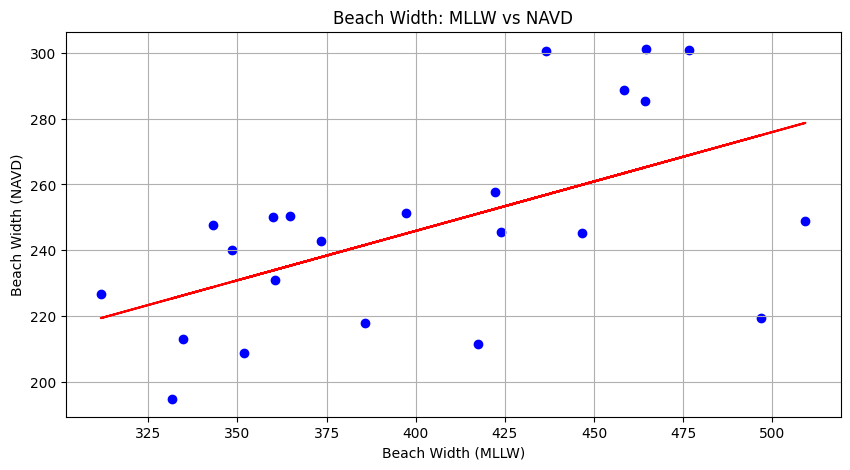

Beach Width Line of Best Fit: Slope (m) = 0.3004, Intercept (b) = 125.7096, R^2 = 0.3164, p-value = 5.2042e-03


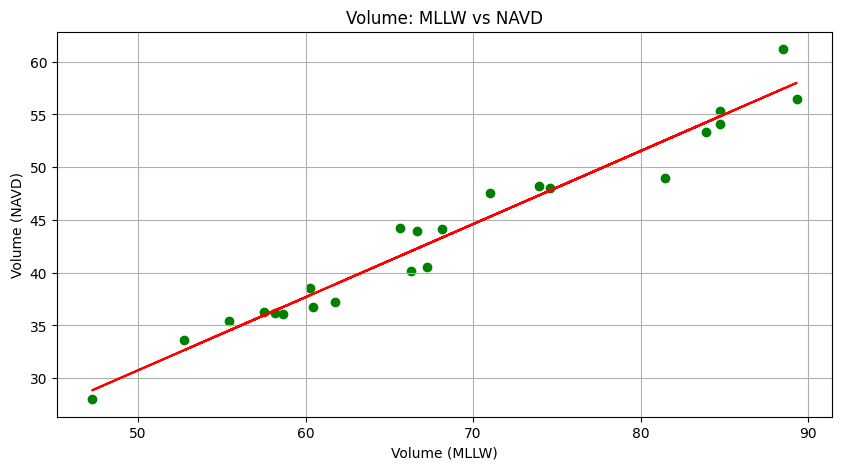

Volume Line of Best Fit: Slope (m) = 0.6929, Intercept (b) = -3.8889, R^2 = 0.9605, p-value = 3.1926e-16


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

# Assuming `volumes_df_mllw` and `volumes_df_navd` are your DataFrames for MLLW and NAVD results respectively

# Merge the two DataFrames on the 'Year' column
comparison_df = pd.merge(volumes_df_mllw, volumes_df_navd, on='Year', suffixes=('_MLLW', '_NAVD'))

# Scatter plot for Beach Width
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'], color='b')
plt.title('Beach Width: MLLW vs NAVD')
plt.xlabel('Beach Width (MLLW)')
plt.ylabel('Beach Width (NAVD)')
plt.grid(True)

# Line of best fit and p-value for Beach Width
slope_width, intercept_width, r_value_width, p_value_width, std_err_width = linregress(comparison_df['Beach Width (feet)_MLLW'], comparison_df['Beach Width (feet)_NAVD'])
plt.plot(comparison_df['Beach Width (feet)_MLLW'], slope_width * comparison_df['Beach Width (feet)_MLLW'] + intercept_width, color='r')

# Calculate R^2 for Beach Width
r2_width = r2_score(comparison_df['Beach Width (feet)_NAVD'], slope_width * comparison_df['Beach Width (feet)_MLLW'] + intercept_width)

plt.show()

# Print slope, intercept, R^2, and p-value for Beach Width
print(f"Beach Width Line of Best Fit: Slope (m) = {slope_width:.4f}, Intercept (b) = {intercept_width:.4f}, R^2 = {r2_width:.4f}, p-value = {p_value_width:.4e}")

# Scatter plot for Volume
plt.figure(figsize=(10, 5))
plt.scatter(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'], color='g')
plt.title('Volume: MLLW vs NAVD')
plt.xlabel('Volume (MLLW)')
plt.ylabel('Volume (NAVD)')
plt.grid(True)

# Line of best fit and p-value for Volume
slope_volume, intercept_volume, r_value_volume, p_value_volume, std_err_volume = linregress(comparison_df['Volume (cubic yards)_MLLW'], comparison_df['Volume (cubic yards)_NAVD'])
plt.plot(comparison_df['Volume (cubic yards)_MLLW'], slope_volume * comparison_df['Volume (cubic yards)_MLLW'] + intercept_volume, color='r')

# Calculate R^2 for Volume
r2_volume = r2_score(comparison_df['Volume (cubic yards)_NAVD'], slope_volume * comparison_df['Volume (cubic yards)_MLLW'] + intercept_volume)

plt.show()

# Print slope, intercept, R^2, and p-value for Volume
print(f"Volume Line of Best Fit: Slope (m) = {slope_volume:.4f}, Intercept (b) = {intercept_volume:.4f}, R^2 = {r2_volume:.4f}, p-value = {p_value_volume:.4e}")


In [22]:
# Create an empty list to store DataFrame, filtered DataFrame, volume, and beach width tuples for NAVD
navd_data_list = []

# Process each BPD file and calculate volumes based on NAVD88
for year, filename in enumerate(file_list, start=2001):
    print(f"Processing NAVD file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file_navd(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        navd_data_list.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year}: Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame from collected data
volumes_navd_df = pd.DataFrame(navd_data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])


Processing NAVD file for year 2001: 05800110.bpd
Year 2001: Volume = 61.19 cubic yards, Beach Width = 300.60 feet
Processing NAVD file for year 2002: 05800211.bpd
Year 2002: Volume = 48.20 cubic yards, Beach Width = 251.20 feet
Processing NAVD file for year 2003: 05800310.bpd
Year 2003: Volume = 47.57 cubic yards, Beach Width = 250.20 feet
Processing NAVD file for year 2004: 05800410.bpd
Year 2004: Volume = 44.24 cubic yards, Beach Width = 242.70 feet
Processing NAVD file for year 2005: 05800510.bpd
Year 2005: Volume = 40.18 cubic yards, Beach Width = 219.30 feet
Processing NAVD file for year 2006: 05800610.bpd
Year 2006: Volume = 40.52 cubic yards, Beach Width = 245.40 feet
Processing NAVD file for year 2007: 05800710.bpd
Year 2007: Volume = 33.59 cubic yards, Beach Width = 194.70 feet
Processing NAVD file for year 2008: 05800810.bpd
Year 2008: Volume = 38.58 cubic yards, Beach Width = 247.60 feet
Processing NAVD file for year 2009: 05800910.bpd
Year 2009: Volume = 36.26 cubic yards, 

/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4wsjr0000gr/T/ipykernel_8559/397660958.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Elevation (ft, NAVD88)'] = df_filtered['Elevation (ft, MLLW, 1983-2001 epoch)'] - navd_threshold
/var/folders/1t/k1qlpw6j281169nkkzj4ws

In [23]:
# Create an empty list to store DataFrame, filtered DataFrame, volume, and beach width tuples for MLLW
mllw_data_list = []

# Process each BPD file and calculate volumes based on MLLW
for year, filename in enumerate(file_list, start=2001):
    print(f"Processing MLLW file for year {year}: {filename}")
    df, df_filtered, volume, beach_width = process_bpd_file(filename)
    if df is not None and df_filtered is not None and volume is not None and beach_width is not None:
        mllw_data_list.append((year, volume, beach_width, df, df_filtered))
        print(f"Year {year}: Volume = {volume:.2f} cubic yards, Beach Width = {beach_width:.2f} feet")
    else:
        print(f"Skipping year {year} due to error in file processing")

# Create DataFrame from collected data
volumes_mllw_df = pd.DataFrame(mllw_data_list, columns=['Year', 'Volume (cubic yards)', 'Beach Width (feet)', 'DataFrame', 'Filtered DataFrame'])


Processing MLLW file for year 2001: 05800110.bpd
Year 2001: Volume = 88.49 cubic yards, Beach Width = 436.60 feet
Processing MLLW file for year 2002: 05800211.bpd
Year 2002: Volume = 73.91 cubic yards, Beach Width = 397.40 feet
Processing MLLW file for year 2003: 05800310.bpd
Year 2003: Volume = 71.01 cubic yards, Beach Width = 360.00 feet
Processing MLLW file for year 2004: 05800410.bpd
Year 2004: Volume = 65.66 cubic yards, Beach Width = 373.30 feet
Processing MLLW file for year 2005: 05800510.bpd
Year 2005: Volume = 66.31 cubic yards, Beach Width = 496.90 feet
Processing MLLW file for year 2006: 05800610.bpd
Year 2006: Volume = 67.22 cubic yards, Beach Width = 423.90 feet
Processing MLLW file for year 2007: 05800710.bpd
Year 2007: Volume = 52.76 cubic yards, Beach Width = 331.60 feet
Processing MLLW file for year 2008: 05800810.bpd
Year 2008: Volume = 60.28 cubic yards, Beach Width = 343.10 feet
Processing MLLW file for year 2009: 05800910.bpd
Year 2009: Volume = 57.49 cubic yards, 

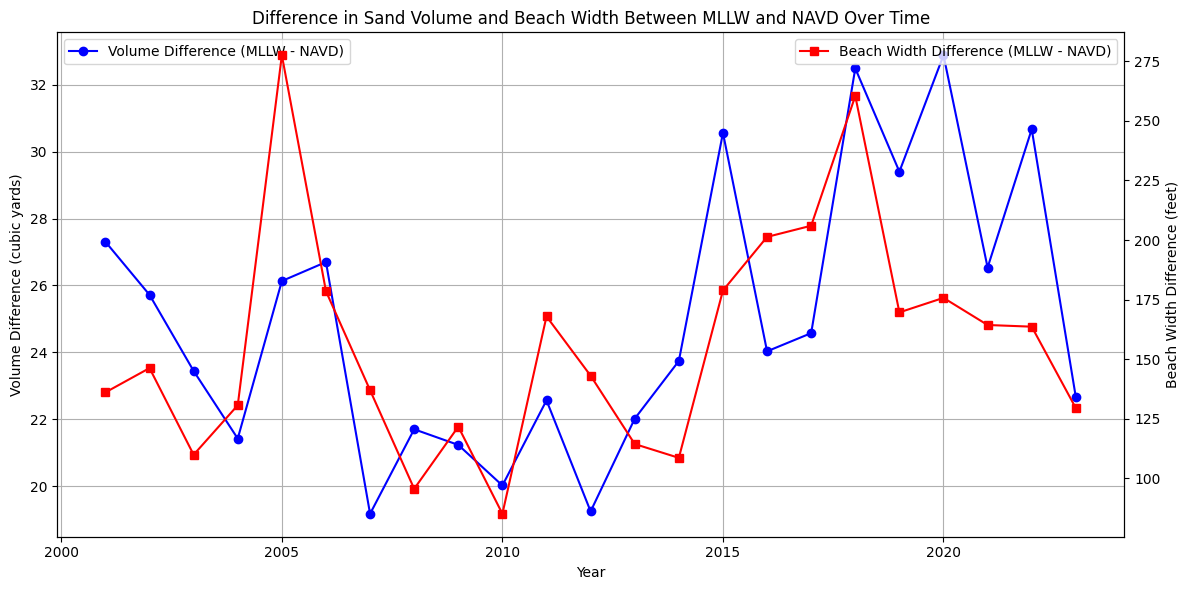

In [24]:
# Merge the NAVD and MLLW DataFrames on the 'Year' column
merged_df = pd.merge(volumes_navd_df, volumes_mllw_df, on='Year', suffixes=('_NAVD', '_MLLW'))

# Calculate the difference in volume and beach width
merged_df['Volume Difference (MLLW - NAVD)'] = merged_df['Volume (cubic yards)_MLLW'] - merged_df['Volume (cubic yards)_NAVD']
merged_df['Beach Width Difference (MLLW - NAVD)'] = merged_df['Beach Width (feet)_MLLW'] - merged_df['Beach Width (feet)_NAVD']

# Plotting the difference in volumes and beach width over time
plt.figure(figsize=(12, 6))

# Plot 1: Volume Difference (left y-axis)
plt.plot(merged_df['Year'], merged_df['Volume Difference (MLLW - NAVD)'], marker='o', color='b', label='Volume Difference (MLLW - NAVD)')
plt.ylabel('Volume Difference (cubic yards)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='upper left')

# Create a secondary y-axis for beach width difference
plt.twinx()

# Plot 2: Beach Width Difference (right y-axis)
plt.plot(merged_df['Year'], merged_df['Beach Width Difference (MLLW - NAVD)'], marker='s', color='r', label='Beach Width Difference (MLLW - NAVD)')
plt.ylabel('Beach Width Difference (feet)')
plt.legend(loc='upper right')

# Title and layout adjustments
plt.title('Difference in Sand Volume and Beach Width Between MLLW and NAVD Over Time')
plt.tight_layout()
plt.show()

